In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [37]:
X, y = make_regression(n_samples=500, n_features=1, bias=4.2,noise=5.1)
print X.shape, y.shape

(500, 1) (500,)


In [38]:
split = int(0.8*X.shape[0])
print split

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape
print X_test.shape

print y_test.shape

400
(400, 1)
(100, 1)
(100,)


In [39]:
## Methods we need to write
def hypothesis(x,w):
    x0 = 1
    return w[0]*x0 + x*[1]

def get_error(x,w, y_true):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        err += (y_true[ix] - hypothesis(x[ix], w))**2
        
    err = err/2*m
    return err


In [40]:
def get_grad(x,w,y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_0 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_1 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
        
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    
    return [grad_0, grad_1]

def get_stochastic_grad(x_sample,w,y_true):
    
    grad_0 = 0.0
    grad_1 = 0.0
    
    grad_0 = (y_true - hypothesis(x_sample, w))*(-1)
    grad_1 = (y_true - hypothesis(x_sample, w))*(-1*x_sample)
    
    return [grad_0, grad_1]

In [41]:
def gradient_descent(x,w,y_true, learning_rate=0.1):
    error = get_error(x,w, y_true)
    
    [grad_0, grad_1] = get_grad(x, w, y_true)
    
    w[0] = w[0] - learning_rate*grad_0
    w[1] = w[1] - learning_rate*grad_1
    
    return error, w

In [42]:
def stochastic_gradient_descent(x, w, y_true, learning_rate=0.1):
    error = get_error(x, w, y_true)
    
    for ix in range(x.shape[0]):
        [grad_0, grad_1] = get_stochastic_grad(x[ix], w, y_true[ix])
        
        w[0] = w[0] - learning_rate*grad_0
        w[1] = w[1] - learning_rate*grad_1
    
    return error, w

In [43]:
W = np.array([0.1, 0.1])
loss = []

In [44]:
for ix in range(400):
    er, W = gradient_descent(X_train, W, y_train, learning_rate=0.01)
    loss.append(er)
    
print W

[ 3.87631085 -2.13625717]


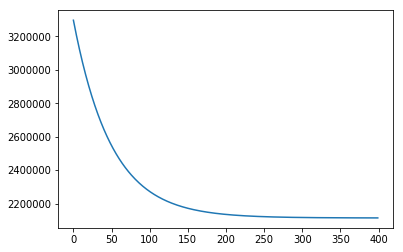

[ 2114062.36434732]


In [45]:
plt.plot(loss)
plt.show()

print loss[-1]

In [20]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lr.score(X_test, y_test)

0.99559208515469133